In [1]:
#Now to compute the r-ball

def compute_ball(adj,center,r):
    ball = {center}
    if r>0:
        for i in range(len(adj[center])):
            if adj[center][i] == 1:
                ball = ball.union(compute_ball(adj,i,r-1))
        return ball
    
    else:
        return ball

In [2]:
# Now pick up the vertices required and compute the distance required
import random
import linecache
from mhfp.encoder import MHFPEncoder
import json
import numpy as np

def compute_ball_avgs(file,query,processed_path, radius_max):
    file = open(file)
    graph = json.load(file)
    adj = np.zeros(shape = (len(graph['mapper']['nodes']),len(graph['mapper']['nodes'])))
    edges = graph['mapper']['links']

    for edge in edges:
        adj[edge['source']-1][edge['target']-1] = 1
        adj[edge['target']-1][edge['source']-1] = 1
    
    ref = random.choice(graph['mapper']['nodes'][query]['vertices'])
    mhfp_encoder = MHFPEncoder()
    line = linecache.getline(processed_path, int(ref)+2)
    struct = line.split(',')[-1]
    ref = mhfp_encoder.encode(struct)
    
    avg_distance = []
    sphere = {}
    prev_ball = {}

    for radius in range(radius_max):
        temp_ball = compute_ball(adj,query,radius)
        sphere = temp_ball.difference(prev_ball)
        print(sphere)
        max1 = 0
        count = 0
        for i in sphere:
            temp = graph['mapper']['nodes'][i]['vertices']
            for j in temp:
                line = linecache.getline(processed_path, j+2)
                struct = line.split(',')[-1]
                temp_struc = mhfp_encoder.encode(struct)
                max1 = max1 + mhfp_encoder.distance(temp_struc,ref)
                #print(mhfp_encoder.distance(temp_struc,ref))
                count = count + 1
        if count > 0:
            avg_distance.append(max1/count)
            prev_ball = temp_ball
        else:
            break
    return avg_distance
    

{3161}
{3043}
{2866}
{2818, 3074, 2823, 2824, 2827, 2828, 2829, 2832, 2834, 2836, 2844, 2973, 2975, 2980, 2983, 2856, 2985, 2986, 2988, 2990, 2991, 2993, 2994, 2995, 2999, 3000, 3009, 3019, 3020, 2766, 3024, 3028, 3029, 3070, 3031, 3032, 3034, 3044, 2789, 2790, 2791, 2797, 3053, 2799, 2803, 3061, 3064, 3065, 3066, 3067, 3069, 2814}
[0.484130859375, 0.484130859375, 0.925537109375, 0.9603177584134616]


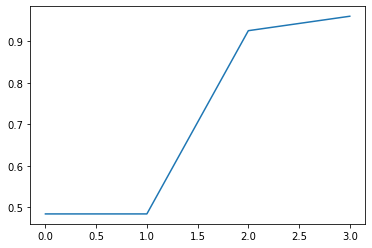

In [5]:
from matplotlib import pyplot as plt

file = './CLI_examples/final_7500_45_3_5.json'
#file = './CLI_examples/final.json'
data = './CLI_examples/processed_data.csv'
query = 3161
radius_max = 4


y = compute_ball_avgs(file,query,data,radius_max)
x = [i for i in range(len(y))]
print(y)
plt.plot(x,y)
plt.show()




In [9]:
import random
a = range(2000000)
for i in range(10):
    temp = random.sample(a,2)
    print(temp)

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[1, 0]
[0, 1]
[0, 1]
[1, 0]
